In [1]:
from matplotlib import pyplot as plt

In [2]:
with open('HarryPotterDataset.txt', 'r', encoding='utf-8') as f:
    text = f.read()

print(f"length of dataset in chars: {len(text)}\n")
print(text[:1000])

length of dataset in chars: 3925666

CHAPTER ONE
THE BOY WHO LIVED
Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say
that they were perfectly normal, thank you very much. They were the last
people you'd expect to be involved in anything strange or mysterious,
because they just didn't hold with such nonsense.
Mr. Dursley was the director of a firm called Grunnings, which made
drills. He was a big, beefy man with hardly any neck, although he did
have a very large mustache. Mrs. Dursley was thin and blonde and had
nearly twice the usual amount of neck, which came in very useful as she
spent so much of her time craning over garden fences, spying on the
neighbors. The Dursleys had a small son called Dudley and in their
opinion there was no finer boy anywhere.
The Dursleys had everything they wanted, but they also had a secret, and
their greatest fear was that somebody would discover it. They didn't
think they could bear it if anyone found out about the Potters. Mrs.
Pott

C:\Users\q603178\AppData\Local\Temp\ipykernel_12116\228562674.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(normal_characters)
C:\Users\q603178\AppData\Local\Temp\ipykernel_12116\228562674.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(special_characters)
C:\Users\q603178\AppData\Local\Temp\ipykernel_12116\228562674.py:39: UserWarning: Glyph 2 () missing from current font.
  plt.tight_layout()
C:\Users\q603178\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


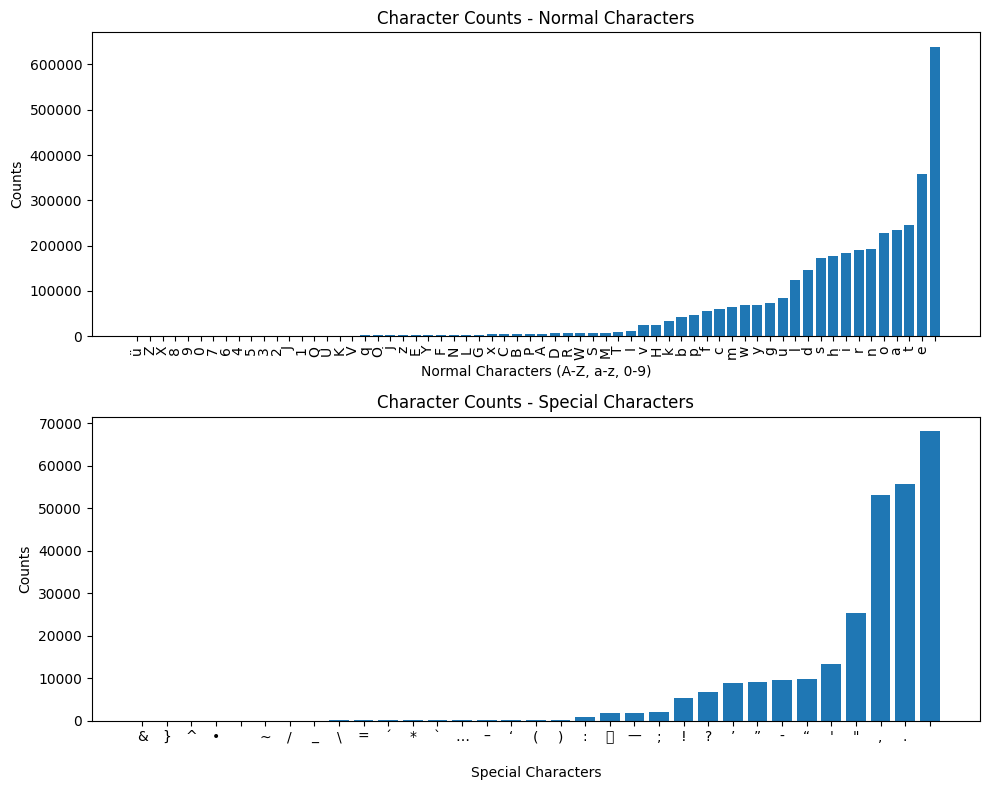

In [3]:
char_counts = {}
for char in text:
   char_counts[char] = char_counts.get(char, 0) + 1
sorted_chars = sorted(char_counts.items(), key=lambda x: x[1])

normal_chars = []
special_chars = []

for char, count in sorted_chars:
   if char.isalnum() or char in [" "]:
       normal_chars.append((char, count))
   else:
       special_chars.append((char, count))

# Convert the normal_chars and special_chars to separate lists for characters and counts
normal_characters, normal_counts = zip(*normal_chars)
special_characters, special_counts = zip(*special_chars)

# Create subplots for the two bar charts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Create the first bar chart for normal characters
ax1.bar(normal_characters, normal_counts)
ax1.set_xticklabels(normal_characters)
ax1.set_xlabel('Normal Characters (A-Z, a-z, 0-9)')
ax1.set_ylabel('Counts')
ax1.set_title('Character Counts - Normal Characters')
ax1.tick_params(axis='x', rotation=90)

# Create the second bar chart for special characters
ax2.bar(special_characters, special_counts)
ax2.set_xticklabels(special_characters)
ax2.set_xlabel('Special Characters')
ax2.set_ylabel('Counts')
ax2.set_title('Character Counts - Special Characters')
ax2.tick_params(axis='x')

# Adjust the spacing between the two subplots
plt.tight_layout()

# Display the charts
plt.show()

======================================================================================
# REMOVE WORDS WITH RARE SPECIAL CHARACTERS
======================================================================================

In [4]:
import re
import os

def remove_words_with_chars(text, chars_to_remove):
   filtered_words = []

   # Iterate through each word
   for word in re.findall(r'\S+|\n', text):
      # Check if any of the characters to remove are present in the word
      if not any(char in word for char in chars_to_remove):
            filtered_words.append(word)

   # Join the filtered words back into a single string with spaces
   filtered_text = ""
   for word, next_word in zip(filtered_words, filtered_words[1:]):
      filtered_text += word
      if word != "\n" and next_word != "\n": filtered_text += " " 

   return filtered_text

remove_chars = [char for char, count in sorted_chars if not char.isalnum() and count < 100]
preprocessed = remove_words_with_chars(text, remove_chars)

# Save preprocessed Dataset
file_path = "HarryPotterPreprocessed.txt"
mode = "w" if os.path.exists(file_path) else "x"

with open(file_path, mode, encoding="utf-8") as file:
    file.write(preprocessed)